# <div style="text-align: center; background-color:black; font-family:Georgia, serif; color: orange; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Orange Quality Analysis 🍊</div>

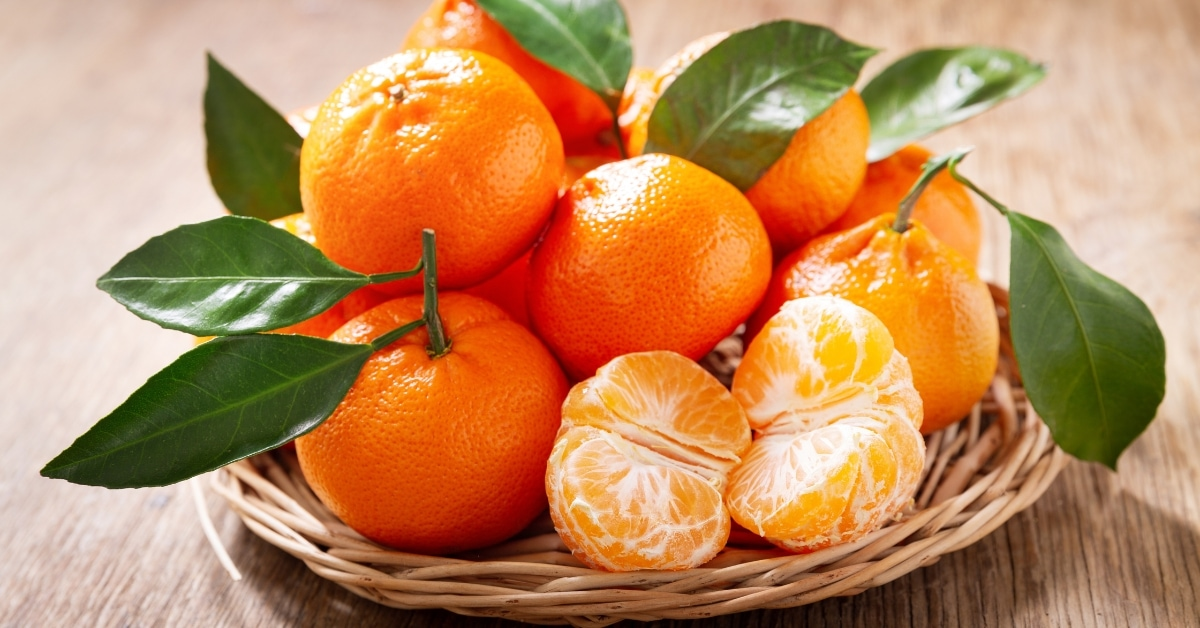

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/orange-quality/Orange Quality Data.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score

import warnings
warnings.filterwarnings('ignore')

2024-05-03 04:41:51.412147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 04:41:51.412306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 04:41:51.598311: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# About Data

> ## Content:
The tabular dataset contains numerical attributes describing the quality of oranges, including their size, weight, sweetness (Brix), acidity (pH), softness, harvest time, and ripeness, as well as categorical attributes such as color, variety, presence of blemishes, and overall quality.

> ## Columns:
    *   Size: Size of orange in cm
    *   Weight: Weight of orange in g
    *   Brix: Sweetness level in Brix
    *   pH: Acidity level (pH)
    *   Softness: Softness rating (1-5)
    *   HarvestTime: Days since harvest
    *   Ripeness: Ripeness rating (1-5)
    *   Color: Fruit color
    *   Variety: Orange variety
    *   Blemishes: Presence of blemishes (Yes/No)
    *   Quality: Overall quality rating (1-5)

In [3]:
data=pd.read_csv('/kaggle/input/orange-quality/Orange Quality Data.csv')

In [4]:
data

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


# Data Preparation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
data.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


> ### DataFrame Size:
    *  This DataFrame has 241 rows and 11 columns
    
> ### Data Types:
    * float64: Columns containing floating-point numbers (e.g., Size, Brix, pH, Softness, Ripeness, Quality).
    * int64: Columns containing integer values (e.g., Weight, HarvestTime).
    * object: Columns containing non-numeric data, likely strings (e.g., Color, Variety, Blemishes).
    
> ### Non-Null Count:
    * Indicates that there are no missing values in any of the columns, as all columns have 241 non-null entries.

In [7]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

# If you want to see all duplicate rows
print("Duplicate Rows:")
print(duplicates)


Duplicate Rows:
Empty DataFrame
Columns: [Size (cm), Weight (g), Brix (Sweetness), pH (Acidity), Softness (1-5), HarvestTime (days), Ripeness (1-5), Color, Variety, Blemishes (Y/N), Quality (1-5)]
Index: []


> It seems that there are no duplicate rows in this DataFrame, as the output of duplicates is an empty DataFrame. This indicates that each row in DataFrame is unique, and there are no exact duplicates present.

# Exploratory Data Analysis

In [8]:
for i in data.columns:
    print(i,':',data[i].nunique())

Size (cm) : 41
Weight (g) : 131
Brix (Sweetness) : 82
pH (Acidity) : 44
Softness (1-5) : 9
HarvestTime (days) : 22
Ripeness (1-5) : 8
Color : 5
Variety : 24
Blemishes (Y/N) : 12
Quality (1-5) : 8


In [9]:
Quality=data['Quality (1-5)'].value_counts(ascending=False)
Quality

Quality (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64

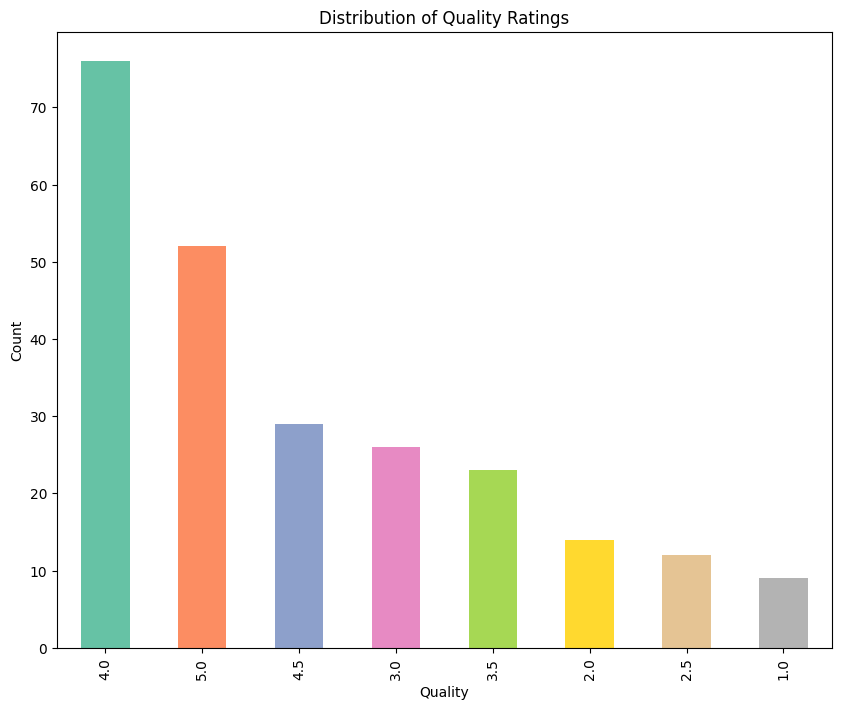

In [10]:
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set2")
Quality.plot(kind='bar', color=colors)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality Ratings')
plt.show()

* The most common quality ratings are 4.0 and 5.0, with 76 and 52 occurrences, respectively. This suggests that a significant portion of the dataset consists of high-quality items, rated 4.0 or 5.0.
* Ratings 3.0, 3.5, and 4.5 also have notable occurrences, with 26, 23, and 29 instances, respectively. This indicates that there is a substantial presence of items with mid-range quality ratings as well.
* While less common, there are still occurrences of lower quality ratings (1.0, 2.0, and 2.5), with 9, 14, and 12 instances, respectively. This suggests that there are some items in the dataset that may have lower quality according to these ratings.

In [11]:
Softness=data['Softness (1-5)'].value_counts(ascending=False)
Softness

Softness (1-5)
3.0    47
4.0    46
5.0    40
2.0    39
1.0    34
2.5    11
3.5     8
1.5     8
4.5     8
Name: count, dtype: int64

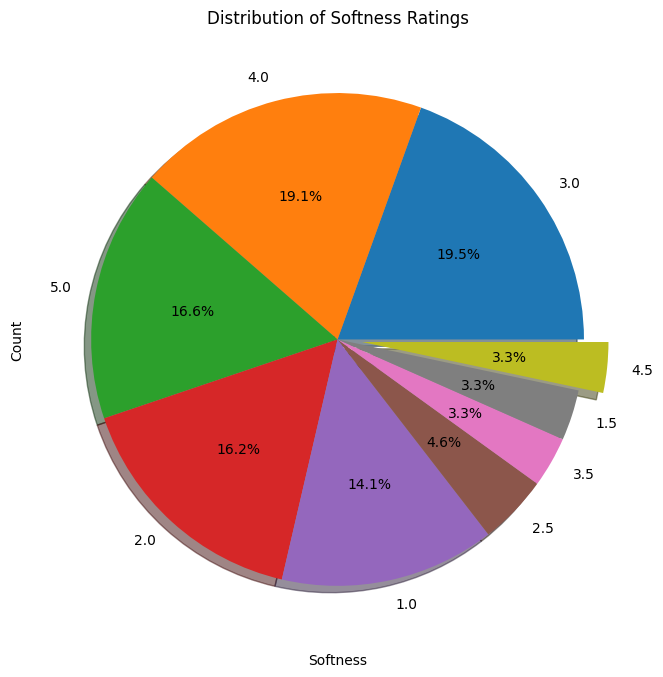

In [12]:
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set2")
Softness.plot(kind='pie',shadow=True,explode=(0,0,0,0,0,0,0,0,0.1), color=colors,autopct='%1.1f%%')
plt.xlabel('Softness')
plt.ylabel('Count')
plt.title('Distribution of Softness Ratings')
plt.show()

* Softness ratings appear to be relatively evenly spread across the 1 to 5 scale, with each rating having a notable number of occurrences. This suggests that there is a diverse representation of softness levels in the dataset.
* Ratings 3.0 and 4.0 are the most common, with 47 and 46 occurrences, respectively. This indicates that softness ratings tend to cluster around the mid-range values, suggesting that moderate softness is prevalent in the dataset.


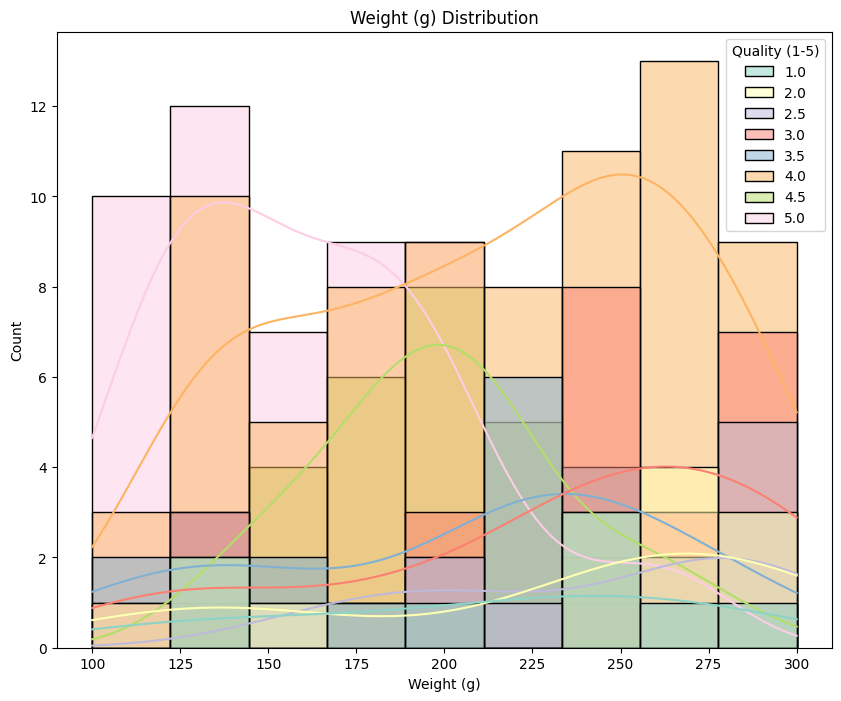

In [13]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Weight (g)',data=data, kde=True,hue='Quality (1-5)',palette='Set3')
plt.title('Weight (g) Distribution')
plt.show()

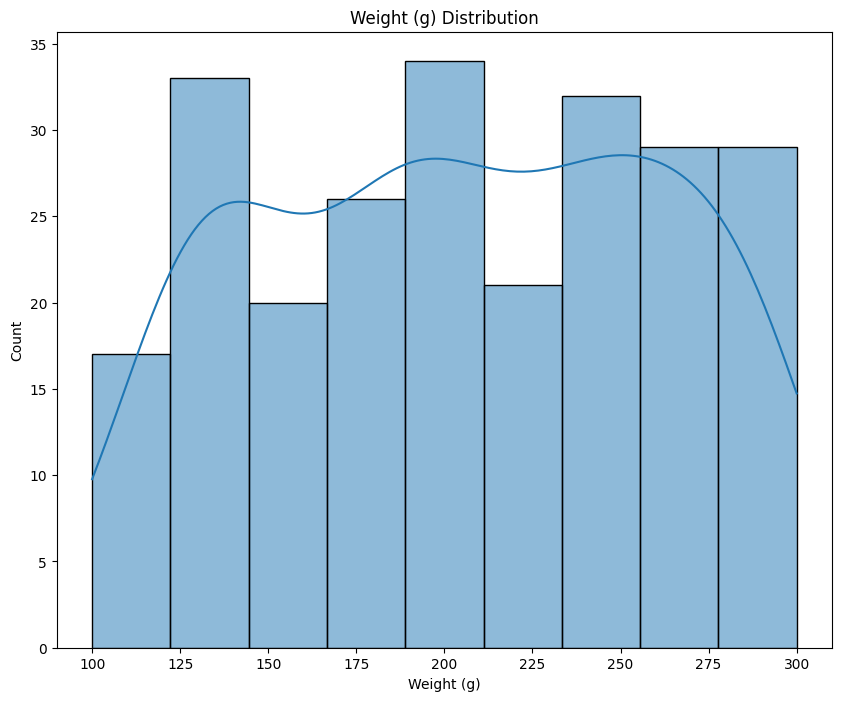

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Weight (g)',data=data, kde=True)
plt.title('Weight (g) Distribution')
plt.show()

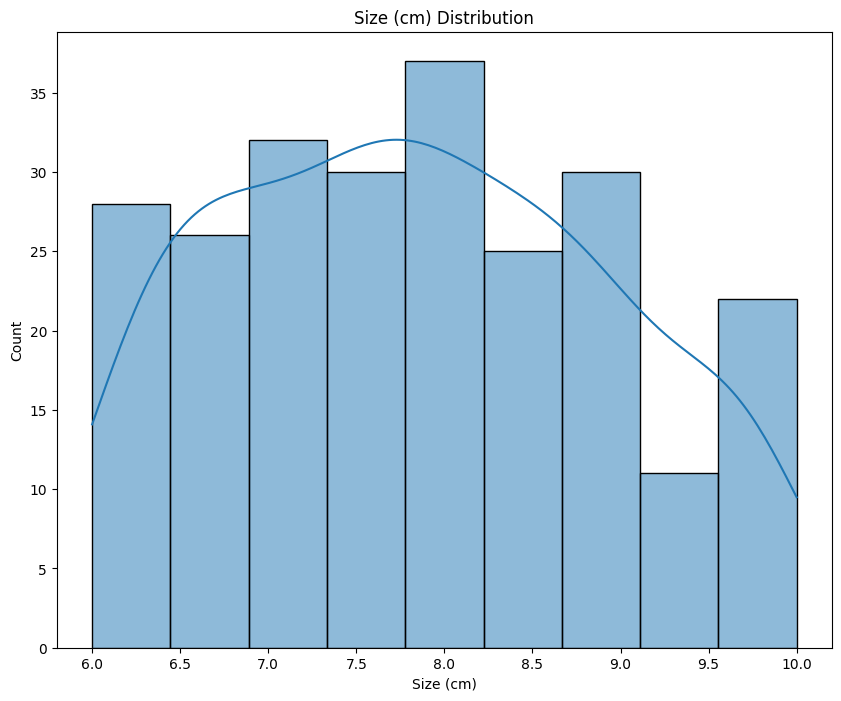

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Size (cm)',data=data, kde=True,palette='#66c2a5')
plt.title('Size (cm) Distribution')
plt.show()

In [16]:
Blemishes = data['Blemishes (Y/N)'].value_counts().reset_index()
Blemishes

,Blemishes (Y/N),count
0,N,149
1,Y (Sunburn Patch),23
2,Y (Scars),17
3,Y (Minor),14
4,Y (Mold Spot),10
5,Y (Bruising),9
6,Y (Split Skin),8
7,Y (Minor Insect Damage),6
8,Y (Sunburn),2
9,Y (Bruise),1


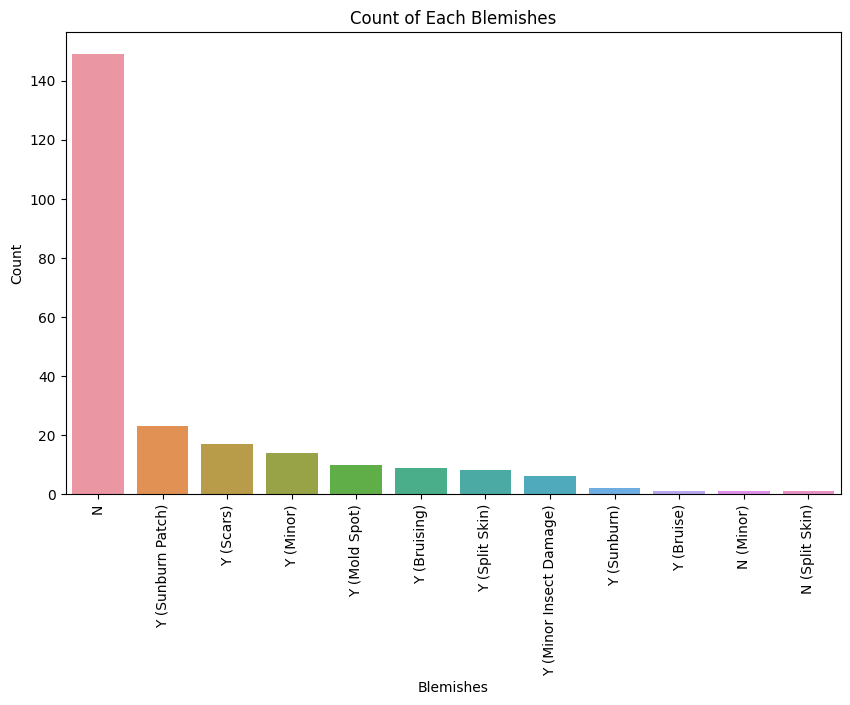

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Blemishes (Y/N)', y='count', data=Blemishes)
plt.title('Count of Each Blemishes')
plt.xlabel('Blemishes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* The data includes different types of blemishes, such as sunburn patches, scars, minor blemishes, mold spots, bruising, split skin, and minor insect damage. Each type has varying occurrences, with sunburn patches being the most common (23 occurrences) followed by scars (17 occurrences).
* The data suggests that blemishes are relatively common, with 78 occurrences of "Y" (Yes) across various types of blemishes and 149 occurrences of "N" (No). This indicates that a significant portion of the dataset contains items with blemishes.
* Blemishes are not evenly distributed across the "Y" category, indicating that some types of blemishes are more common than others. For example, sunburn patches, scars, and minor blemishes have higher occurrences compared to mold spots, bruising, split skin, and minor insect damage.

In [18]:
Ripeness = data['Ripeness (1-5)'].value_counts().reset_index()
Ripeness

,Ripeness (1-5),count
0,5.0,58
1,4.0,52
2,3.0,46
3,2.0,27
4,4.5,23
5,1.0,17
6,3.5,12
7,2.5,6


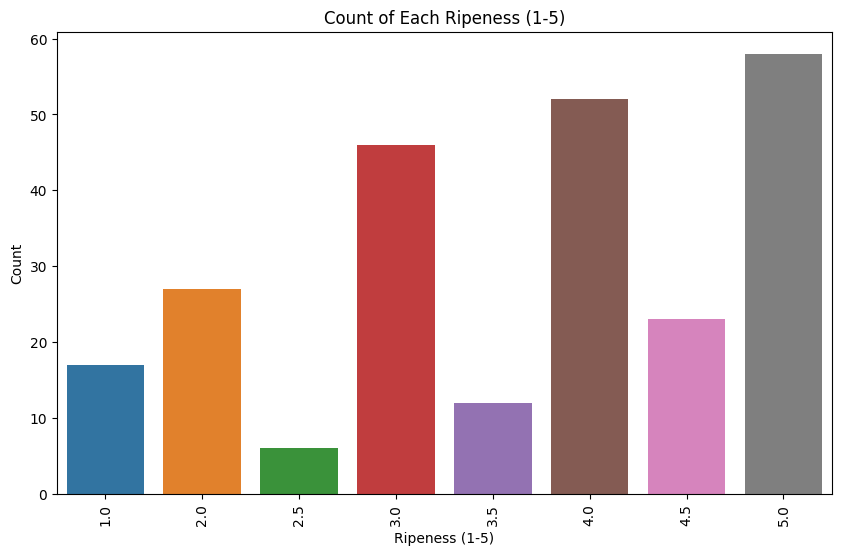

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ripeness (1-5)', y='count', data=Ripeness)
plt.title('Count of Each Ripeness (1-5)')
plt.xlabel('Ripeness (1-5)')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* Ripeness ratings appear to be spread across the entire 1 to 5 scale, with each rating having a notable number of occurrences. This suggests that there is a diverse representation of ripeness levels in the dataset.
* Ratings 3.0, 4.0, and 5.0 are the most common, with 46, 52, and 58 occurrences, respectively. This indicates that ripeness ratings tend to cluster around the mid to higher range values, suggesting that items in the dataset are generally ripe or approaching ripeness.
* The presence of occurrences across all ripeness ratings (1 to 5) suggests variability in the ripeness levels of items in the dataset. This variability could arise from differences in harvesting times, storage conditions, or other factors affecting ripeness.
* While less common, there are still occurrences of ripeness ratings at the extremes (1.0, 2.0) as well as intermediate values (2.5, 3.5, 4.5). This indicates that there are items in the dataset that exhibit both very low and very high levels of ripeness, as well as those with intermediate levels.

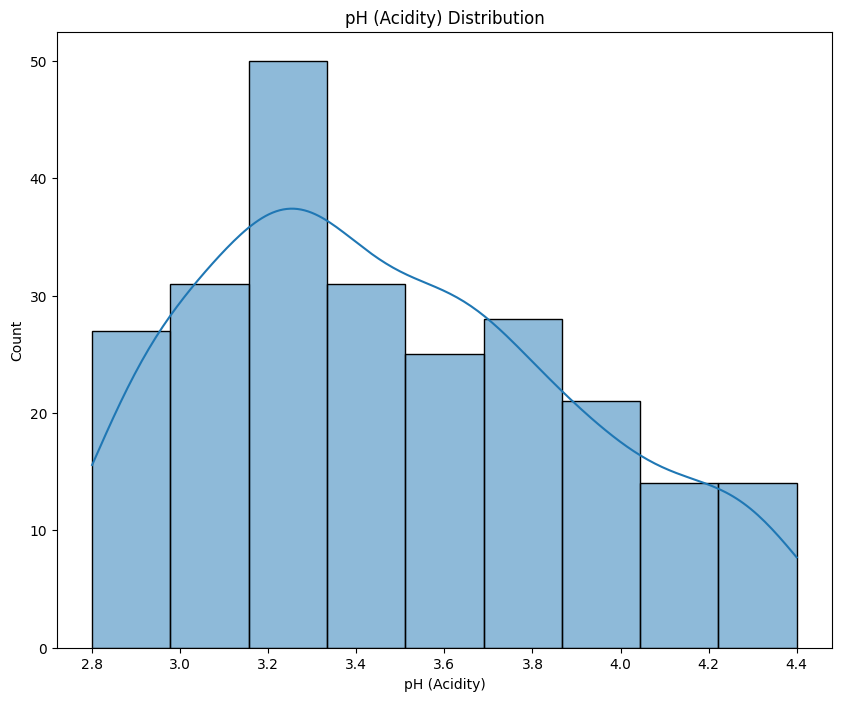

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(x='pH (Acidity)',data=data, kde=True,palette='#66c2a5')
plt.title('pH (Acidity) Distribution')
plt.show()

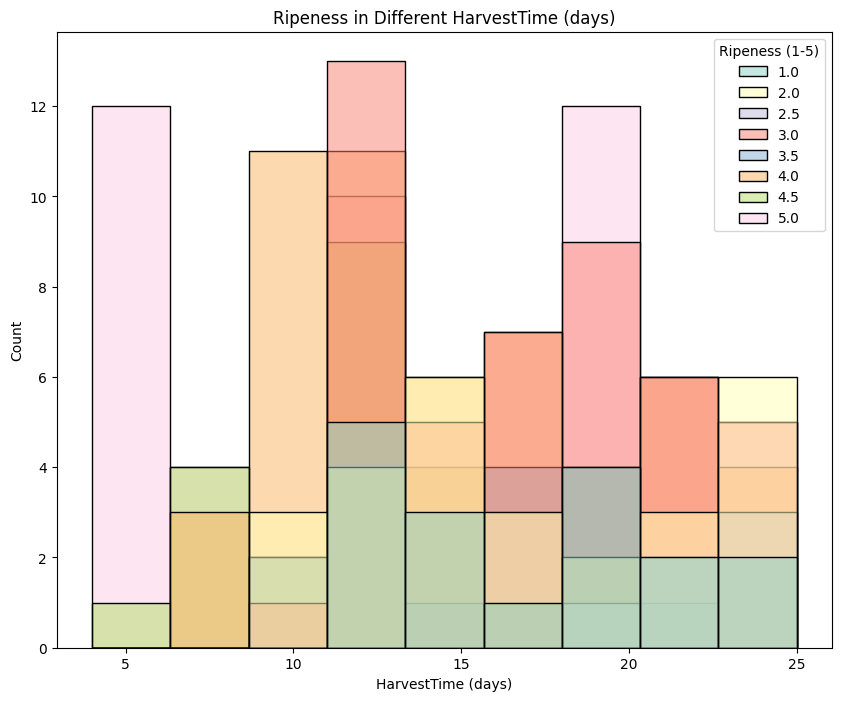

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(x='HarvestTime (days)',data=data,hue='Ripeness (1-5)',palette='Set3')
plt.title('Ripeness in Different HarvestTime (days)')
plt.show()

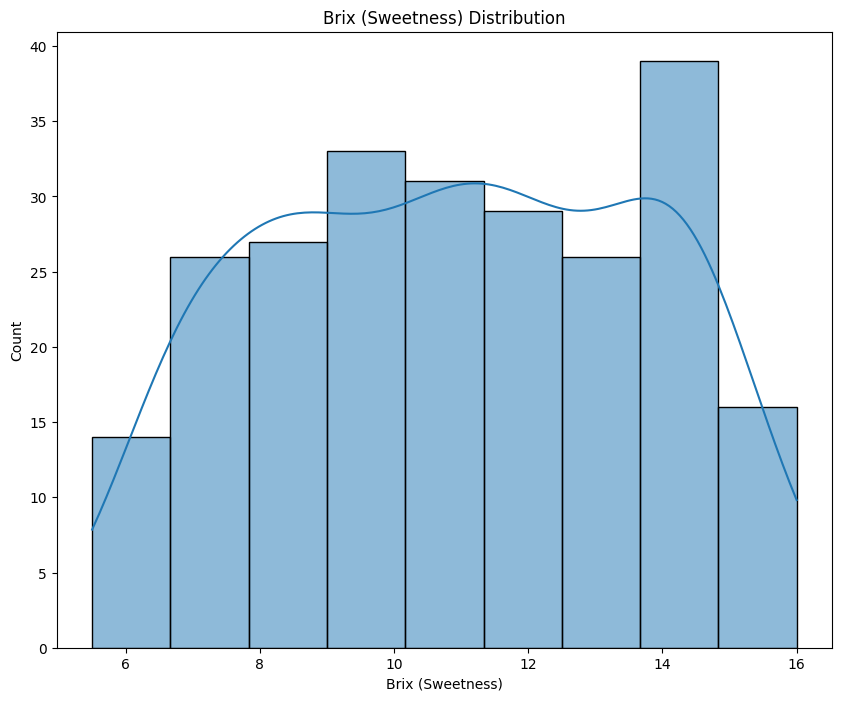

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Brix (Sweetness)',data=data, kde=True,palette='#66c2a5')
plt.title('Brix (Sweetness) Distribution')
plt.show()

In [23]:
color = data['Color'].value_counts().reset_index()
color

,Color,count
0,Deep Orange,75
1,Light Orange,64
2,Orange-Red,55
3,Orange,38
4,Yellow-Orange,9


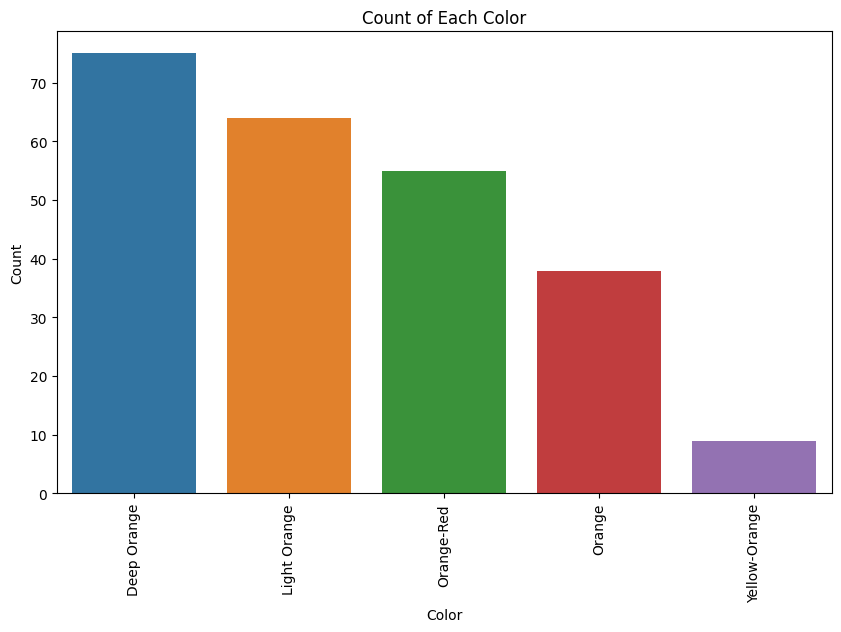

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Color', y='count', data=color)
plt.title('Count of Each Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

* The dataset includes several different colors, including Deep Orange, Light Orange, Orange-Red, Orange, and Yellow-Orange. This variety suggests a diverse range of colors represented in the dataset.
*  Deep Orange appears to be the most common color, with 75 occurrences, followed by Light Orange (64 occurrences) and Orange-Red (55 occurrences). This indicates that these colors are more prevalent compared to others in the dataset.


In [25]:
HarvestTime = data.groupby('Softness (1-5)')['HarvestTime (days)'].value_counts().reset_index()
HarvestTime

,Softness (1-5),HarvestTime (days),count
0,1.0,15,4
1,1.0,5,3
2,1.0,6,3
3,1.0,11,3
4,1.0,4,2
...,...,...,...
100,5.0,21,2
101,5.0,24,2
102,5.0,12,1
103,5.0,16,1


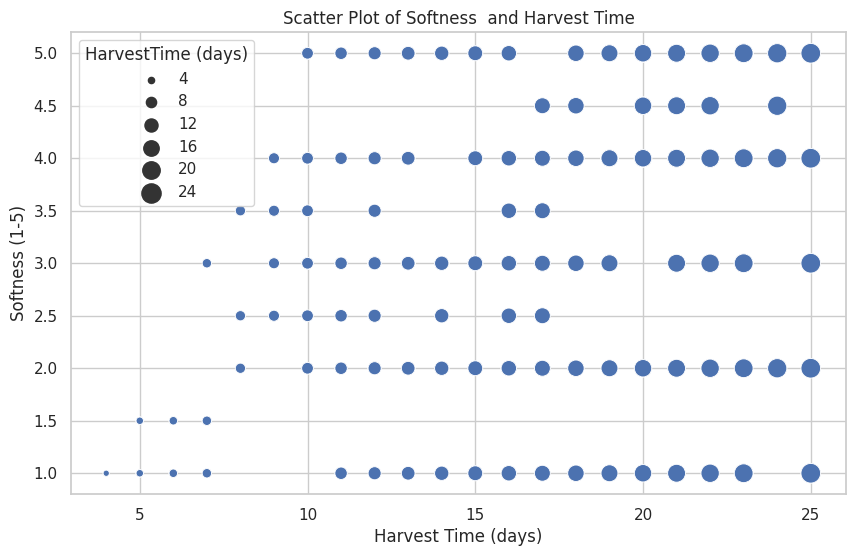

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='HarvestTime (days)', y='Softness (1-5)', size='HarvestTime (days)', sizes=(20, 200))
plt.title('Scatter Plot of Softness  and Harvest Time')
plt.xlabel('Harvest Time (days)')
plt.ylabel('Softness (1-5)')
plt.show()

* Analyzing the distribution of softness ratings at different harvest times can reveal insights into how the duration of time affects the softness of the items being harvested. 
* The counts of softness ratings at different harvest times can indicate the variability in softness levels across the 1 to 5 rating scale. This variability could be influenced by factors such as growing conditions, ripeness, handling practices, and environmental factors.

In [27]:
Variety=data['Variety'].value_counts().reset_index()
Variety

,Variety,count
0,Cara Cara,21
1,Temple,18
2,Star Ruby,18
3,Navel,16
4,Moro (Blood),16
5,Tangerine,14
6,Clementine,14
7,Washington Navel,14
8,Satsuma Mandarin,13
9,Ortanique (Hybrid),13


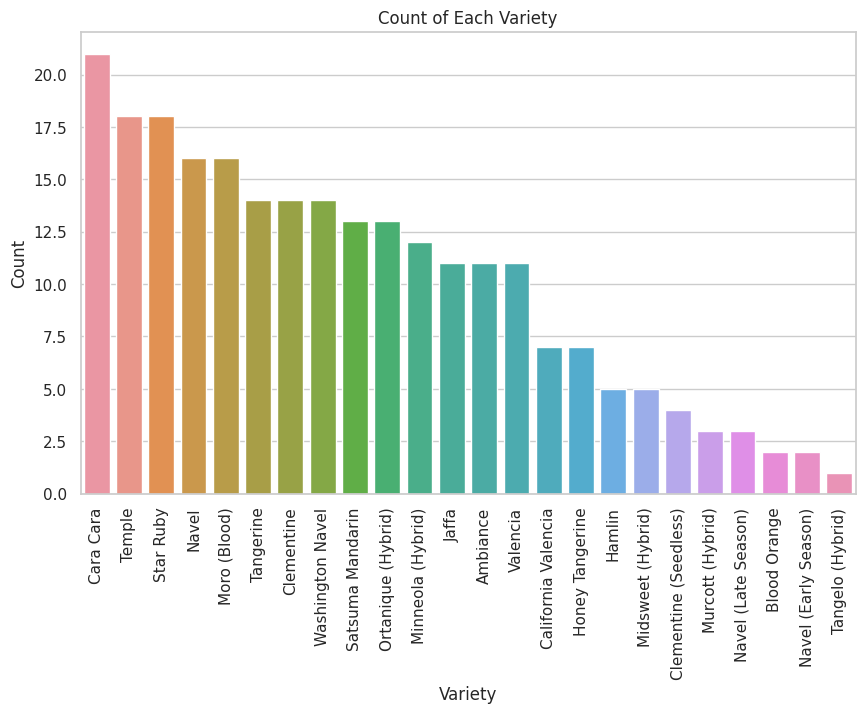

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Variety', y='count', data=Variety)
plt.title('Count of Each Variety')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [29]:
data

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [30]:
data.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

# Model

## LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [32]:
data['Color'] = lb.fit_transform(data['Color'])
data['Variety'] = lb.fit_transform(data['Variety'])
data['Blemishes (Y/N)'] = lb.fit_transform(data['Blemishes (Y/N)'])


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    int64  
 8   Variety             241 non-null    int64  
 9   Blemishes (Y/N)     241 non-null    int64  
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 20.8 KB


In [34]:
# Prepare the data
X = data.iloc[:,0:10]
X


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5


In [35]:
y = data['Quality (1-5)']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
y_train

115    4.0
205    2.0
216    2.5
132    5.0
84     3.5
      ... 
106    3.0
14     4.0
92     4.0
179    3.0
102    2.0
Name: Quality (1-5), Length: 192, dtype: float64

In [38]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# RandomForestRegressor

In [39]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [40]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.371959693877551


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are the true labels and predicted values, respectively
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.371959693877551
Mean Absolute Error: 0.43418367346938774
R-squared: 0.5006568493150685


# feature importances

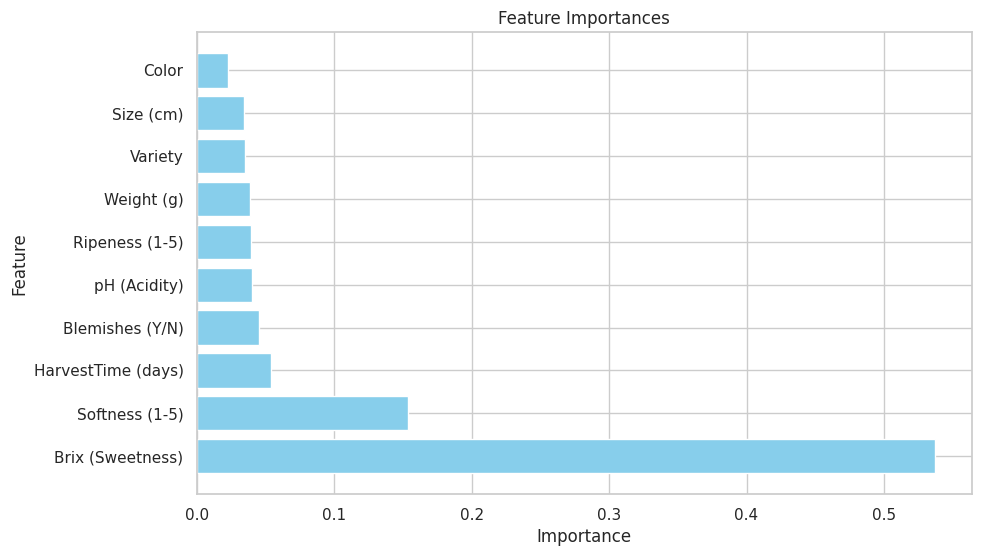

In [43]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# SVR

In [44]:
from sklearn.svm import SVR

In [45]:

# Train the SVR model
model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for non-linear relationships
model.fit(X_train_scaled, y_train)


SVR()

In [46]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.25824959119807417


In [47]:
# Assuming y_test and y_pred are the true labels and predicted values, respectively
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.25824959119807417
Mean Absolute Error: 0.39104631673354956
R-squared: 0.6533087679806675


In [48]:
# Define SVR parameters for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Create SVR model
svr = SVR()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters:
{'C': 1, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error: 0.25824959119807417
Mean Absolute Error: 0.39104631673354956
R-squared: 0.6533087679806675


> Model Performance: The Support Vector Regression (SVR) model achieved a mean squared error (MSE) of approximately 0.2582, mean absolute error (MAE) of approximately 0.3910, and R-squared (R²) value of approximately 0.6533 on the testing set. These metrics indicate that the model provides reasonably accurate predictions of quality ratings based on the input features.

> Hyperparameters: The best hyperparameters for the SVR model, as determined by grid search cross-validation, are:

    C: 1
    Epsilon: 0.1
    Gamma: 'auto'
    Kernel: 'rbf'






## Conclusion
> Overall, the SVR model shows promise in accurately predicting quality ratings based on the provided features. However, there may still be room for improvement, and further analysis could be conducted to explore additional feature engineering, model tuning, or ensemble techniques to enhance predictive performance. Additionally, evaluating the model's performance on unseen data and potentially deploying it in a real-world setting would be the next steps to ensure its effectiveness in practical applications.
